In [25]:
#importation des librairies du projet sur les prix des maisons des quartiers des maisons de Boston
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#Phase 1: Compréhension des données

In [26]:
from sklearn.datasets import load_boston
#données quartiers de boston prix
donnees_boston_districts = load_boston()
# keys of the dictionary, as a list.
donnees_boston_districts.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [27]:
#affichage donnees_boston.keys
#informations sur les maisons, prix des maisons, caractéristiques jeu de données, description du jeu de données

In [28]:
donnees_boston_districts.DESCR.split("\n")


['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [29]:
#Phase 2: Préparation des données

In [30]:
#Notre jeu de données est en Data Frame grace à pandas
donnees_boston_districts_df = pd.DataFrame(donnees_boston_districts.data, columns=donnees_boston_districts.feature_names)
#Affichage des 5 premières lignes avec .head()
donnees_boston_districts_df.head()
print('Nombre de valeurs nulles pour chaque variable explicative:')
#Création d'une nouvelle colonne qui est PRIX
donnees_boston_districts_df['PRIX'] = donnees_boston.target
#Voir la présence de valeurs nulles
donnees_boston_districts_df.isnull().sum()

Nombre de valeurs nulles pour chaque variable explicative:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRIX       0
dtype: int64

In [31]:
#Affichage de la commande donnees_boston_districts_df.isnull().sum()
#pas de valeurs nulles sur chacun des variables explicatives

In [32]:
#Phase 3: Création du modèle de régression linéaire

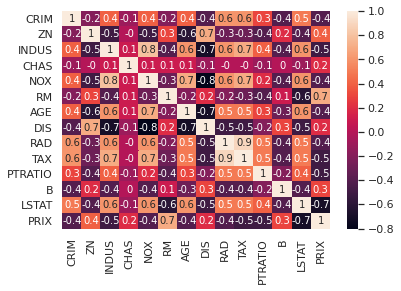

In [33]:
#etude de la correlation
#matrice de corrélation pour les variables explicatives avec un chiffre après virgule( avec un grand nombre de variables explicativs, il faut choisir quelques unes)
matrice_correlation_boston = donnees_boston_districts_df.corr().round(1)
#affichage matrice sous forme carte thermique
sns.heatmap(data=matrice_correlation_boston, annot=True)

In [34]:
#choix finale des variables:LSTAT, RM,TAX,PTRATIO

In [49]:
#on utilise seulement 4 variables explicatives: LSTAT, RM,TAX,PTRATIO
X_varexplicatives=pd.DataFrame(np.c_[donnees_boston_districts_df['LSTAT'],donnees_boston_districts_df['RM'],donnees_boston_districts_df['TAX'],donnees_boston_districts_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])
Y = donnees_boston_districts_df['PRIX']
 
#création de la base d'apprentissage et une base de test avec sklearn
from sklearn.model_selection import train_test_split

#structure du jeu de données: 80% apprentissage et 20%test
X_train, X_test, Y_train, Y_test = train_test_split(X_varexplicatives, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [23]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodelelineaire = LinearRegression()
lmodelelineaire.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#Phase 4: Évaluation du modèle de régression linéaire

In [21]:
# Evaluation des données d'apprentissage (80 % du modèle)
#importation de r2_score(coefficient de détermination)
from sklearn.metrics import r2_score
y_predict_train = lmodelelineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_predict_train)))
r2 = r2_score(Y_train, y_predict_train)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_predict_test = lmodelelineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_predict_test)))
r2 = r2_score(Y_test, y_predict_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.303422189850911
le score R2 est 0.6725758894106004


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.897434387599151
le score R2 est 0.6936559148531671


In [ ]:
#erreur quadratique apprentissage:5.303422189850911
#r2 apprentissage:0.67
#erreur quadratique test:4.897
#r2 test:0.69

In [ ]:
#même méthode avec la régression polynomiale

In [ ]:
#Problème régression linéaire

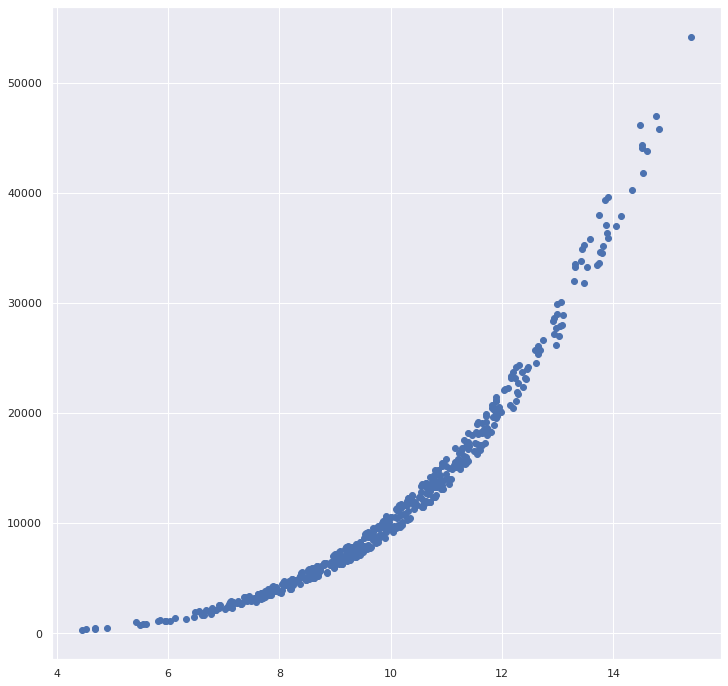

In [22]:
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [12,12]
 
#plt.figure(figsize=(12,12))
 
 
np.random.seed(0)
#jeu de données sous la forme y = f(x)  avec f(x) = x^4 + bx^3 + c 
 
x = np.random.normal(10, 2, 500)
y = x ** 4 + np.random.uniform(-1, 1,500)*(x ** 3) + np.random.uniform(0, 1,500)
 
plt.scatter(x,y)
plt.show()

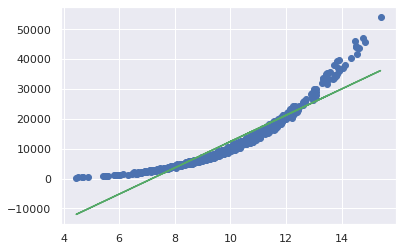

In [41]:
x1 = x[:, np.newaxis]
y1 = y[:, np.newaxis]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
 
model.fit(x,y)
y_predict = model.predict(x)
 
plt.scatter(x1, y1)
plt.plot(x, y_predict, color='g')
plt.show()

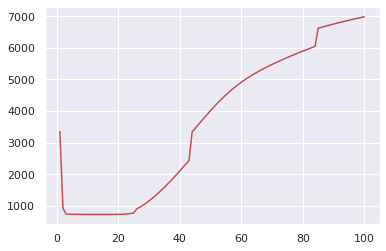

In [47]:
#importer PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
#Méthode pour trouver le meilleur modèle selon un degré de polynome
def degreeChoice (x,y,degre):
    polynomial_features= PolynomialFeatures(degree=degre)
    #appeler fit_transform
    x_polynomial = polynomial_features.fit_transform(x)
    model = LinearRegression()
    #fitter le méthode de régression polynomiale the polynomial regression model
    model.fit(x_polynomial, y)
    #predire x_polynomial
    y_polynomial_predict = model.predict(x_polynomial)
    #MSE erreur
    rmse = np.sqrt(mean_squared_error(y, y_polynomial_predict))
    #sort_axis = operator.itemgetter(0)
    #trier les vaelurs x et y_polynomial_predict
    sorted_zip = sorted(zip(x, y_polynomial_predict))
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse, x_p, y_poly_pred_P

rmselist = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100
for i in np.arange(1, 101):
     
    rmselist[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1]= degreeChoice (x,y,i)
     
plt.plot(np.arange(1, 101), rmselist, color='r')
plt.show()

In [ ]:
#observations du plot: On s’aperçoit que l’erreur de prédiction
# de notre modèle diminue considérablement jusqu’au degré 20 puis augmente subitement pour les ordres supérieurs.

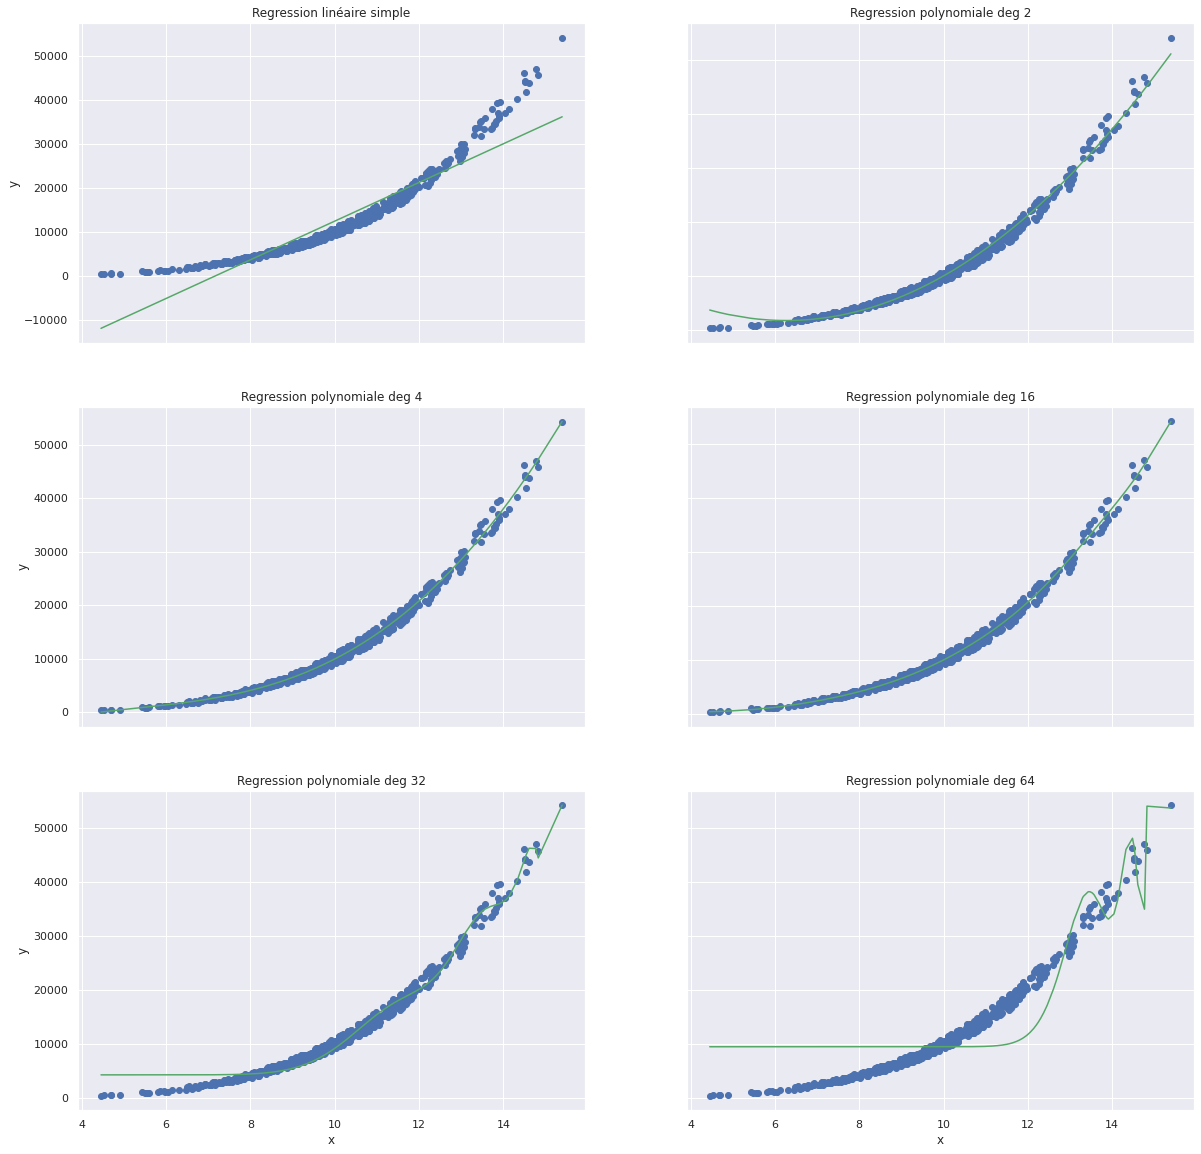

In [48]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
 
 
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x_p_list[0],y_poly_pred_P_list[0],color='g')
axs[0, 0].set_title('Regression linéaire simple')
 
#degre 2
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x_p_list[1],y_poly_pred_P_list[1],color='g')
axs[0, 1].set_title('Regression polynomiale deg 2')
 
 
#degre 4
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x_p_list[3],y_poly_pred_P_list[3],color='g')
axs[1, 0].set_title('Regression polynomiale deg 4')
 
 
#degre 16
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_p_list[15],y_poly_pred_P_list[15],color='g')
axs[1, 1].set_title('Regression polynomiale deg 16')
 
#degre 32
axs[2, 0].scatter(x, y)
axs[2, 0].plot(x_p_list[31],y_poly_pred_P_list[31],color='g')
axs[2, 0].set_title('Regression polynomiale deg 32')
 
#degre 64
axs[2, 1].scatter(x, y)
axs[2, 1].plot(x_p_list[63],y_poly_pred_P_list[63],color='g')
axs[2, 1].set_title('Regression polynomiale deg 64')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
 
for ax in axs.flat:
    ax.label_outer()

In [ ]:
#On se rend compte qu’on obtient un bon modèle de régression avec un degré=4 et pas pour les autres modèles 

In [53]:
#on defintit la fonction pour entrainer et choisir notre modèle en fonction du degré du polynome
 
def evalPolynomialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    #fitter données apprentissage
    X_train_polynomiale = polynomial_features.fit_transform(X_train)
    #fitter données test
    X_test_polynomiale = polynomial_features.fit_transform(X_test)
    #instance regression linear
    model = LinearRegression()
    #fitter
    model.fit(X_train_polynomiale, Y_train)
    # Evaluation donnes apprentissage
 
    y_predict_train = model.predict(X_train_polynomiale)
    #rmse erreur
    rmse = (np.sqrt(mean_squared_error(Y_train, y_predict_train)))
    #score r2
    r2 = r2_score(Y_train, y_predict_train)
 
    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation donnes test
    y_predict_test = model.predict(X_test_polynomiale)
    #rmse erreur
    rmse = (np.sqrt(mean_squared_error(Y_test, y_predict_test)))
    #score r2
    r2 = r2_score(Y_test, y_predict_test)
 
    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse


In [62]:
evalPolynomialRegression(4)

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 2.9095938200110214
le score R2 est 0.9014485576271525


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 3.456219569252854
le score R2 est 0.8474279798844129


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 0.8474279798844129,
 3.456219569252854)

In [ ]:
#Meilleurs résultats avec regression polynomiale que pour la régression linéaire ( pas d'overfitting ni d'underfitting)
# erreur quadratique apprentissage: 2,90 <5.30(apprentissage)
#erreur quadratique test: 3,45< 4.89
#r2 apprentissage: 0.90 >0.67
#r2:0.84>0.69